In [ ]:
# default_exp examples

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
# hide
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"' + s + '; }')

# Einleitung

Dieses Dokument soll anhand einiger Beispiele die Möglichkeiten von Jupyter-Notebooks aufzeigen, Literate-Programming zu realisieren. Beim Literate-Programming wird der Quellcode und die dazu gehörende Dokumentation integriert in einem Dokument entwickelt und gepflegt. Der prinzipielle Ablauf ist folgender:

![Ablauf Jupyter-Notebook nach PDF bzw. .PY](./img/Ablauf.svg)

D.h. aus dem Jupyter-Notebook (.ipynb) wird im ersten Prozess über die Zwischenschritte Markdown und LaTeX am Ende ein PDF-Dokument. Im zweiten Prozess wird aus dem selben Jupyter-Notebook der lauffähige Python-Code erzeugt. Ermöglicht wird dies durch den Einsatz des Frameworks nbdev. nbdev ist in Python geschrieben, genauso wie die Datenanalyse-Software, die Sie im Rahmen dieser Veranstaltung erstellen sollen. Falls Sie eine Einführung in Python benötigen, so wäre z.B. das Buch von Kofler[^Kofler18] geeignet. Einen fundierten und unterhaltsamen Überblick über sog. NoSQL-Datenbanken bietet ein Vortrag von Fowler[^fowler13], der per Youtube verfügbar ist.


[^Kofler18]: [@kofler_python_2018]
[^fowler13]: [@fowler_introduction_2013]

# Jupyter Notebook

Jupyter Notebooks sind im Grunde JSON-Dateien, die mit Hilfe der Web-Anwendung Jupyter-notebook oder Jupyter-lab editiert werden. Ein Notebook besteht aus einer Abfolge von Zellen, die entweder Markdown-Text, (Python-)Quellcode oder Rohdaten enthalten. Diese Zellen können beliebig oft und in beliebiger Reihenfolge ausgeführt werden. Auf diese Weise können Code und Dokumentation in einem Dokument gepflegt und gespeichert werden. Das Framework `nbdev`[^fastai21] unterstützt dieses Vorgehen durch die Bereitstellung eines Vorgehensmodells und den dazu passenden Werkzeugen.

[^fastai21]: [@fastai_welcome_2021]

# Markdown

In diesem Notebook sind verschiedene Beispiele für die Möglichkeiten zur Dokumentation von Programmcode zusammengestellt, die bei der Konvertierung des Notebooks nach LaTeX (und dann nach PDF) verwendet werden können. 
Im Prinzip steht die komplette Markdown-Syntax zur Verfügung, die von [Jupyter-Notebooks](https://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Working%20With%20Markdown%20Cells.html) unterstützt wird. Über die hier gezeigten Beispiele könnte dieses [Cheat-Sheet](https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet) helfen.

- Listen (dies ist selbst eine solche)
- internal references
- Mathematische Formeln
- weitere Blöcke
    - Bilder
    - Tabellen
    - Quellcode
    - Plots
- Verweise und Fußnoten
- Verschiedene Hinweisblöcke



## Listen
Nicht nummerierte Liste siehe oben.

### Nummerierte Liste
1. Eins
2. Zwei
    1. Zwei Unterpunkt eins
    1. Zwei Unterpunkt zwei
1. Drei

    

## Bilder

Ein einfaches Beipielbild von der Festplatte. Übliche Dateitypen sind .svg, .jpg und .png:

![Ein Zahnwal](./img/Delphin300.jpg)

Graphviz ist ein Werkzeug, um Graphen zu erzeugen. Auch PlantUML basiert auf Graphviz und ist in Jupyter-Notebooks einsetzbar.

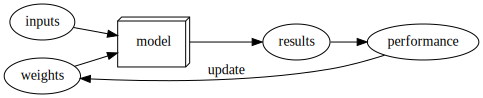

In [ ]:
#hide_input
#title Training a machine learning model
#id training_loop
#alt The basic training loop
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

Wie hier zu sehen, werden von `nbdev2md` keine korrekten Bildunterschriften erzeugt. Daher sollte ein per graphviz erzeugtes Bild manuell eingebunden werden. Eventuell wird zu einem späteren Zeitpunkt eine entsprechende Funktionalität zur Verfügugng gestellt.

## Tabellen
Für die Erzeugung von Tabellen gibt es verschiedene Möglichkeiten in Markdown selbst, aber auch mit \LaTeX. Hier einige Beispiele:

### Markdown

Table: Preise und Vorteile diverser Früchte

+---------------+---------------+--------------------+
| Fruit         | Price         | Advantages         |
+===============+===============+====================+
| Bananas       | $1.34         | - built-in wrapper |
|               |               | - bright color     |
+---------------+---------------+--------------------+
| Oranges       | $2.10         | - cures scurvy     |
|               |               | - tasty            |
+---------------+---------------+--------------------+


Die obige Tabelle wird im Jupyter-Notebook nicht korrekt angezeigt, im PDF-Dokument aber sehr wohl, wenn vor und nach der Tabelle Leerzeilen eingefügt werden.

Bei der unteren Tabellenform funktioiert beides:
      
| Stretch/Untouched | ProbDistribution | Accuracy |
| :-                | :-:              | -:       |
| linksbündig       | zentriert        | .843      

Table: Dies ist die Überschrift zur zweiten Tabelle. Wenn die Überschrift sehr lang sein sollte, kann sie sich auch über mehr als eine Zeile erstrecken.
      

### \LaTeX

Es ist auch möglich Tabellen und andere Elemente in \LaTeX-Code einzufügen.

\begin{tabular}{|l|r|}\hline
Age & Frequency \\ \hline
18--25  & 15 \\
26--35  & 33 \\
36--45  & 22 \\ \hline
\end{tabular}

Hier das Beispiel einer Formel:

Die Formel selbst sollte in einer eigenen "Raw"-Zelle stehen und in dieser oberhalb und unterhalb von einer Leerzeile umgeben sein. Dies ist erforderlich, um mögliche Probleme bei der Konvertierung zu vermeiden.

# nbdev

Für die nbdev-Werkzeuge werden die einzelnen Code-Zellen mit speziellen Kommenaren versehen, um nvdev zu signalisieren, wie der jeweilige Code-Block zu verarbeiten ist. Um zu sehen, was die unterschiedlichen Kommentare bewirken, sehen Sie sich bitte die aus diesem Notebook generierte PDF-Datei sowie die generierte Datei examples.py im Verzeichnis `nb2ltx` an.

- `#export`: Zelle wird nicht angezeigt; Code wird von `nbdev` in die Moduldatei exportiert
- `#exports`: Zelle und Ausgabe der Zelle werden angezeigt; Code wird von nbdev in die Moduldatei exportiert


In [ ]:
# export
def nix():
   return

In [ ]:
# exports
def wirdAngezeigt():
    return 'Sie werden exportiert und angezeigt!'

print('Hi')

Hi


- `#hide`: Von der folgenden Zelle wird weder der Quellcode noch die Ausgabe angezeigt

In [ ]:
# hide
def verstecken():
    return "Wir verstecken Sie..."

verstecken()

'Wir verstecken Sie...'

- `#hide_input`: Von dieser Zelle wird nicht der Quellcode, sondern nur die Ausgabe angezeigt:

In [ ]:
#hide_input
360/2.7

133.33333333333331

In [ ]:
print("Aufruf der Funktion 'verstecken()':")
verstecken()

Aufruf der Funktion 'verstecken()':


'Wir verstecken Sie...'

- `#sonstiger Kommentar` oder kein Kommentar: Zelle und auch das Ergebnis werden angezeigt

In [ ]:
# dies ist ein Test...
wirdAngezeigt()

'Sie werden exportiert und angezeigt!'

In [ ]:
import sys 
print('Zelle ohne Kommentar')
sys.getdefaultencoding()

Zelle ohne Kommentar


'utf-8'

## Markdown Tests

### Umlaute

... sind möglich!
Umlauttest: öäüÄÜÖß
